In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
from sklearn.decomposition import PCA

In [23]:
pd.set_option("max_rows", 25)

In [24]:
# Apply the default theme
sns.set_theme()
sns.set_style("whitegrid")

In [25]:
data_path = '/home/achara/data/achara/'
df = pd.read_csv(data_path + 'pc_data_2017_to_2019_2.csv')

In [26]:
df.columns

Index(['DateTime', 'SensorDepth_Water_EXO', 'PC_Water_EXO', 'Chla_Water_EXO',
       'DO_Water_EXO', 'DO-Sat_Water_EXO', 'SpCond_Water_EXO',
       'Temperature_Water_EXO', 'pH_Water_EXO', 'rel_fl', 'month', 'day',
       'year', 'SolarRad_Air_LiCor', 'TP', 'TSP', 'SRP', 'TN', 'NO3', 'NH4',
       'PP', 'PRECTOTCORR', 'ALLSKY_SFC_SW_DWN', 'ALLSKY_SFC_LW_DWN'],
      dtype='object')

Index(['DateTime', 'SensorDepth_Water_EXO', 'PC_Water_EXO', 'Chla_Water_EXO',
       'DO_Water_EXO', 'DO-Sat_Water_EXO', 'SpCond_Water_EXO',
       'Temperature_Water_EXO', 'pH_Water_EXO', 'rel_fl', 'month', 'day',
       'year', 'SolarRad_Air_LiCor', 'TP', 'TSP', 'SRP', 'TN', 'NO3', 'NH4',
       'PP', 'PRECTOTCORR', 'ALLSKY_SFC_SW_DWN', 'ALLSKY_SFC_LW_DWN'],
      dtype='object')

In [27]:
x=df[df.columns[~df.columns.isin(['DateTime', 'PC_Water_EXO', 'month', 'day', 'year'])]]
y=df['PC_Water_EXO']

In [28]:
x_scaled = pd.DataFrame(StandardScaler().fit_transform(x), columns=list(x.columns.values))

In [29]:
pca = PCA(n_components=11)
pca_features = pca.fit_transform(X=x_scaled, y=y)

In [30]:
pca.components_

array([[ 0.31019089, -0.20296571, -0.17811315, -0.3962395 , -0.18367748,
        -0.28110823, -0.29952655,  0.20177508, -0.26900942,  0.21901006,
        -0.11540695, -0.23682136,  0.00897754, -0.23815258,  0.20461687,
         0.24111065,  0.05839189, -0.21900974, -0.18099385],
       [-0.26116813,  0.0942659 ,  0.12898821,  0.26520257,  0.14387207,
         0.19743304,  0.3085453 , -0.04188005, -0.00736478,  0.41872083,
         0.02045831, -0.22745255,  0.05557025, -0.29474601,  0.41713761,
         0.42819578,  0.04129364,  0.02092857, -0.04801293],
       [-0.24450459,  0.05822568, -0.17959488, -0.01126421,  0.11108349,
         0.19899452,  0.23176944, -0.16174414, -0.42069456, -0.22029575,
        -0.37415399, -0.27659354, -0.2694425 , -0.03474735, -0.17132326,
        -0.17587648,  0.03699458, -0.33103075, -0.29253951],
       [ 0.14745354,  0.34253462,  0.49890779,  0.14625173, -0.02025079,
        -0.37453705, -0.07072139,  0.13560128,  0.11965865, -0.10751085,
        -0.303

array([[ 0.31019089, -0.20296571, -0.17811315, -0.3962395 , -0.18367748,
        -0.28110823, -0.29952655,  0.20177508, -0.26900942,  0.21901006,
        -0.11540695, -0.23682136,  0.00897754, -0.23815258,  0.20461687,
         0.24111065,  0.05839189, -0.21900974, -0.18099385],
       [-0.26116813,  0.0942659 ,  0.12898821,  0.26520257,  0.14387207,
         0.19743304,  0.3085453 , -0.04188005, -0.00736478,  0.41872083,
         0.02045831, -0.22745255,  0.05557025, -0.29474601,  0.41713761,
         0.42819578,  0.04129364,  0.02092857, -0.04801293],
       [-0.24450459,  0.05822568, -0.17959488, -0.01126421,  0.11108349,
         0.19899452,  0.23176944, -0.16174414, -0.42069456, -0.22029575,
        -0.37415399, -0.27659354, -0.2694425 , -0.03474735, -0.17132326,
        -0.17587648,  0.03699458, -0.33103075, -0.29253951],
       [ 0.14745354,  0.34253462,  0.49890779,  0.14625173, -0.02025079,
        -0.37453705, -0.07072139,  0.13560128,  0.11965865, -0.10751085,
        -0.303

In [31]:
cols = list(x_scaled.columns.values)

n_pca = pca.components_.shape[0]

In [32]:
important_idx = [np.abs(pca.components_[i]).argmax() for i in range(n_pca)]

In [33]:
important_features = [cols[i] for i in important_idx]

In [34]:
important_features

['DO-Sat_Water_EXO',
 'PP',
 'SolarRad_Air_LiCor',
 'DO_Water_EXO',
 'PRECTOTCORR',
 'rel_fl',
 'Chla_Water_EXO',
 'NO3',
 'rel_fl',
 'ALLSKY_SFC_LW_DWN',
 'Chla_Water_EXO']

['DO-Sat_Water_EXO',
 'PP',
 'SolarRad_Air_LiCor',
 'DO_Water_EXO',
 'PRECTOTCORR',
 'rel_fl',
 'Chla_Water_EXO',
 'NO3',
 'rel_fl',
 'ALLSKY_SFC_LW_DWN',
 'Chla_Water_EXO']

In [35]:
pca.explained_variance_ratio_

array([0.21012144, 0.17728297, 0.15455385, 0.10945989, 0.07126188,
       0.06539909, 0.05348147, 0.05000186, 0.02852251, 0.02155591,
       0.01730013])

array([0.21012144, 0.17728297, 0.15455385, 0.10945989, 0.07126188,
       0.06539909, 0.05348147, 0.05000186, 0.02852251, 0.02155591,
       0.01730013])

In [36]:
sum(pca.explained_variance_ratio_)

0.9589409946526267

0.9589409946526262

In [37]:
n_pcas = [i for i in range(len(x_scaled.columns))]
def get_value(n):
    p = PCA(n_components=n)
    p.fit_transform(x_scaled)
    return sum(p.explained_variance_ratio_)

total_explained = [get_value(i) for i in n_pcas]

<AxesSubplot:>

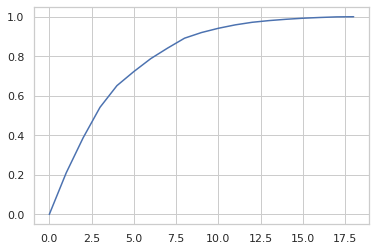

<AxesSubplot:>

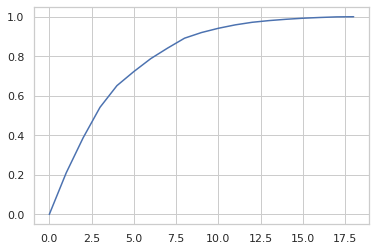

In [38]:
sns.lineplot(x=n_pcas, y=total_explained)

with 11 principal components we can explain ~96% of the data and the important features are:

```
['DO-Sat_Water_EXO',
'PP',
 'SolarRad_Air_LiCor',
 'DO_Water_EXO',
 'PRECTOTCORR',
 'rel_fl',
 'Chla_Water_EXO',
 'NO3',
 'ALLSKY_SFC_LW_DWN',
 'Chla_Water_EXO']
 ```


In [40]:
df_new = df[['NH4', 'DO-Sat_Water_EXO',
 'PP',
 'SolarRad_Air_LiCor',
 'DO_Water_EXO',
 'PRECTOTCORR',
 'rel_fl',
 'Chla_Water_EXO',
 'NO3',
 'rel_fl',
 'ALLSKY_SFC_LW_DWN',
 'Chla_Water_EXO']]

In [41]:
df_new.head()

,NH4,DO-Sat_Water_EXO,PP,SolarRad_Air_LiCor,DO_Water_EXO,PRECTOTCORR,rel_fl,Chla_Water_EXO,NO3,rel_fl,ALLSKY_SFC_LW_DWN,Chla_Water_EXO
0,0.005,101.610000,16.681741,127.38941,9.17,4.319851,0.880,0.358058,0.191,0.880,310.373726,0.358058
1,0.005,101.776667,16.681741,127.38941,9.18,4.319851,0.862,0.544445,0.191,0.862,310.373726,0.544445
2,0.005,101.230000,16.681741,127.38941,9.16,4.319851,0.844,0.843708,0.191,0.844,310.373726,0.843708
3,0.005,101.590000,16.681741,127.38941,9.16,4.319851,0.826,0.939807,0.191,0.826,310.373726,0.939807
4,0.005,101.490000,16.681741,127.38941,9.15,4.319851,0.835,0.797623,0.191,0.835,310.373726,0.797623
